<a href="https://colab.research.google.com/github/Maverick-B9/Computer-vision/blob/main/emotiondetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?d1=0
!unzip train.zip?d1=0

--2024-12-06 04:38:53--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?d1=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?d1=0&rlkey=x3sz1h2o797inkqer67q7dg6b [following]
--2024-12-06 04:38:53--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?d1=0&rlkey=x3sz1h2o797inkqer67q7dg6b
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15865c39636aef23905e203b6e.dl.dropboxusercontent.com/cd/0/inline/CfudM3Z6z9SE3bRuFy5EM003x8t6llByJroNozVhxbGGGWuf7W8YzcYs-hmitaSt5sexNRAQsLfJJJJH28yVeXwyNa2ckMLdb6nsW4cpykzfjjfdlTxKBr4hE_SRHSkJzo3VvXI7C3gLDtmKP9Mi9x1m/file# [following]
--2024-12-06 04:38:54--  https://uc15865c39636aef23905e203b6e.dl.dropboxusercontent.com/cd/0/in

In [ ]:

!pip install tensorflow

y
y


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from skimage.io import imread
from skimage.transform import rescale
# from tensorflow.keras.preprocessing import image  # This import is redundant, removed
from PIL import Image
from tqdm import tqdm
from keras.layers import Input, UpSampling2D, Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img



In [ ]:
# Working with pre trained model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Input, UpSampling2D, Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen= ImageDataGenerator(rescale=1./255)
test_data= val_datagen.flow_from_directory(directory= "/content/train",
                                            target_size=(224,224),
                                            batch_size=32,
                                            )

Found 350 images belonging to 7 classes.


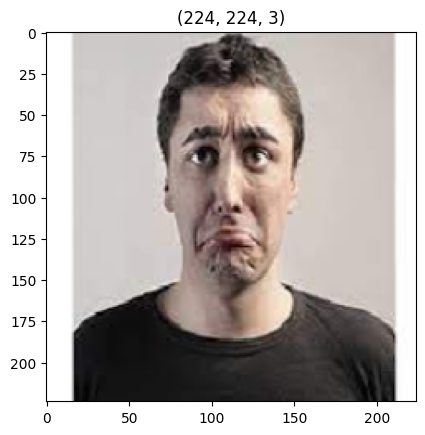

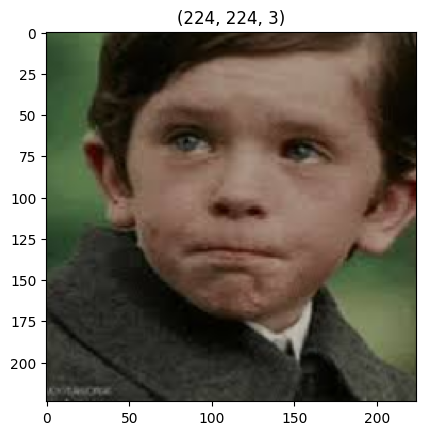

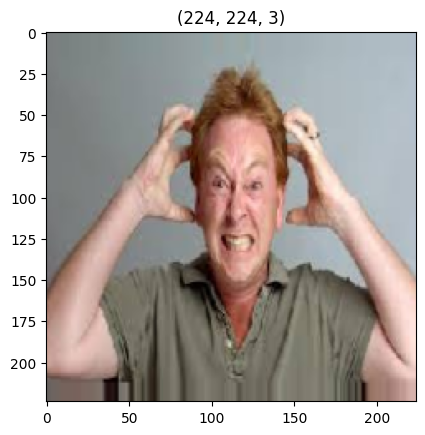

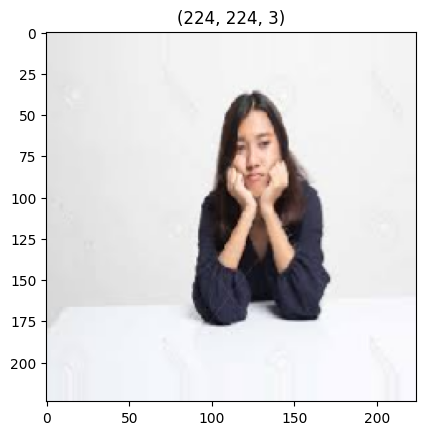

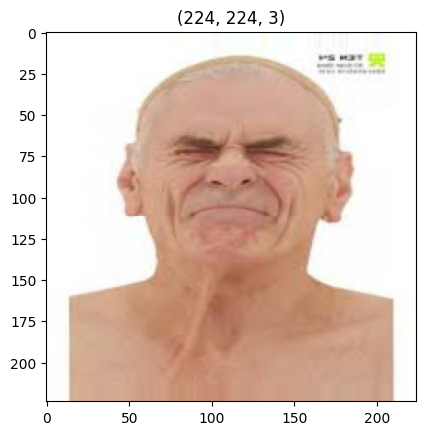

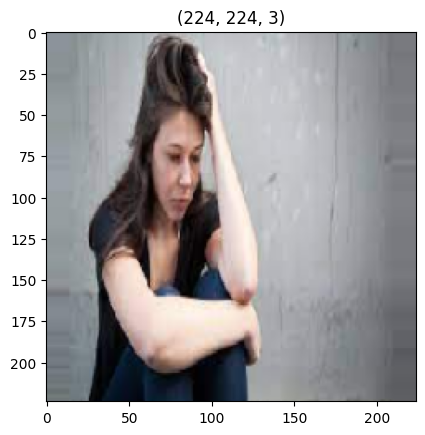

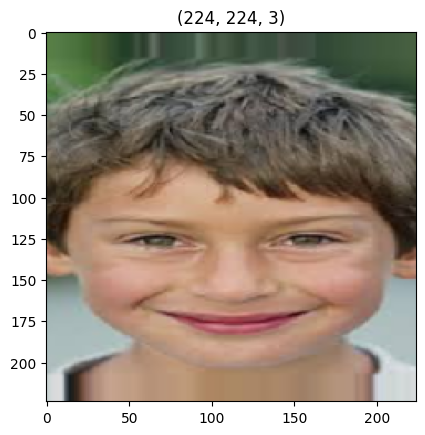

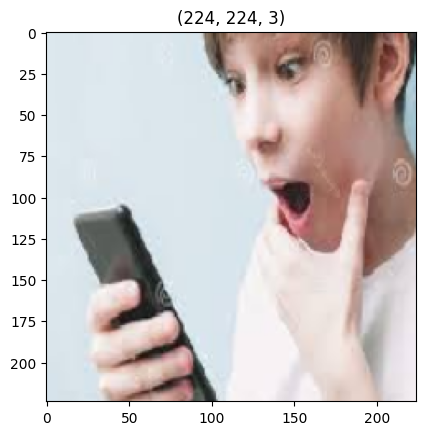

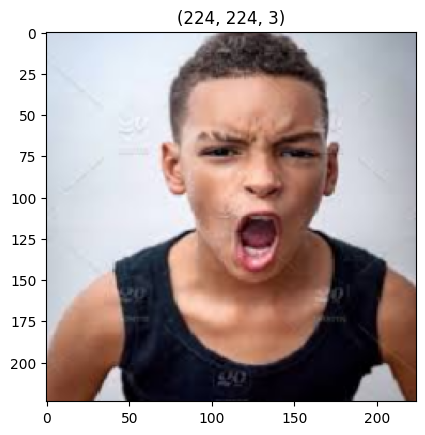

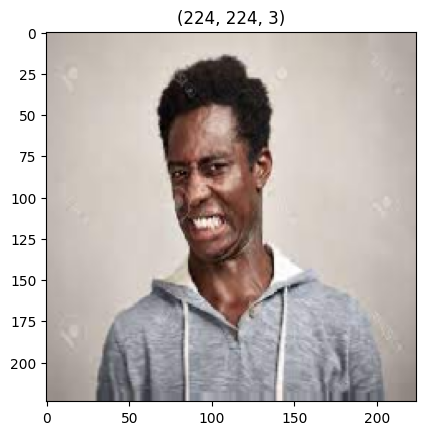

In [ ]:
# to visualize the images in the traing data denerator
import matplotlib.pyplot as plt
# Instead of train_data.next(), use next(train_data)
t_img , label = next(train_data)

#-----------------------------------------------------------------------------
# function when called will prot the images

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Model # Import Model if it is not already imported
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img

# ... (Your data loading and preprocessing code) ...

# Define your model architecture (e.g., using Sequential or Functional API)
# Get the number of classes from your train_data generator
num_classes = len(train_data.class_indices)  # Assuming you have a 'train_data' object

model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Adjust input shape if needed
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use num_classes for the output layer
])

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ... (Rest of your code, including callbacks) ...

# Now you can use train_data in Model.fit
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.1618 - loss: 112.2568
Epoch 1: val_accuracy improved from -inf to 0.14062, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 656ms/step - accuracy: 0.1620 - loss: 111.5484 - val_accuracy: 0.1406 - val_loss: 49.3635
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 5s 594ms/step - accuracy: 0.1562 - loss: 53.4219

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.14062 to 0.14894, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.1562 - loss: 53.4219 - val_accuracy: 0.1489 - val_loss: 30.7220
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.1281 - loss: 33.4585
Epoch 3: val_accuracy did not improve from 0.14894
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 500ms/step - accuracy: 0.1268 - loss: 33.1049 - val_accuracy: 0.1406 - val_loss: 13.1987
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.1250 - loss: 15.5210
Epoch 4: val_accuracy improved from 0.14894 to 0.20213, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.1250 - loss: 15.5210 - val_accuracy: 0.2021 - val_loss: 11.2153
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1342 - loss: 9.5863
Epoch 5: val_accuracy did not improve from 0.20213
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1351 - loss: 9.3922 - val_accuracy: 0.1406 - val_los

In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.keras")

ValueError: File not found: filepath=/content/best_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:

h =  hist.history
h.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

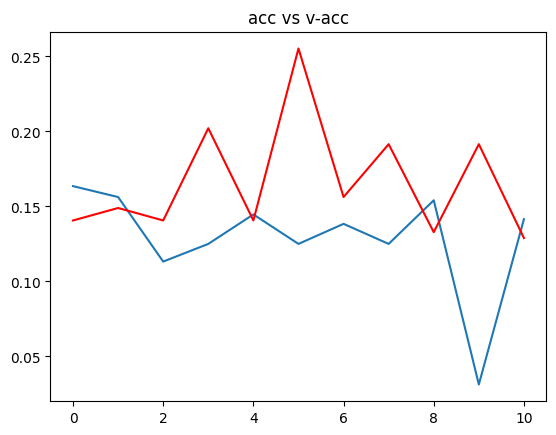

In [ ]:

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

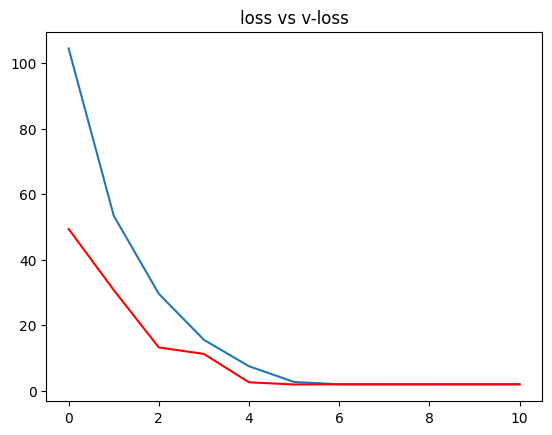

In [ ]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
 The image is of Fear


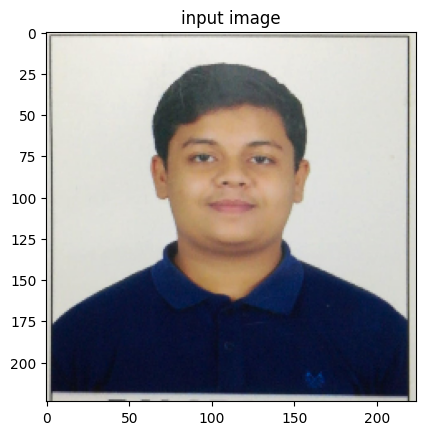

In [ ]:

# path for the image to see if it predics correct class
import numpy as np

path = "/content/ballu.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The image is of {op[pred]}")
# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()